# eSports Prize Analysis

Like every other analysis, I'll begin by loading and displaying the first few rows of each dataset to get a feel of the structure and determine the best way to analyze it.

In [1]:
import pandas as pd

In [2]:
general_esport_data = pd.read_csv('../Data/GeneralEsportData.csv')

general_esport_data.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,468939.32,339093.45,437,232
1,Age of Empires II,1999,Strategy,3171415.06,1130300.41,1936,1532
2,Age of Empires III,2005,Strategy,114643.65,41800.00,160,143
3,Age of Empires IV,2021,Strategy,933523.68,409117.93,524,297
4,Age of Empires Online,2011,Strategy,9346.56,775.00,42,44


In [3]:
historical_esport_data = pd.read_csv('../Data/HistoricalEsportData.csv')

historical_esport_data.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-05-01,QuakeWorld,300.0,3,1
3,1998-07-01,Quake II,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


The `GeneralEsportData.csv` shows general information about various eSports games, while the `HistoricalEsportData.csv` contains historical data on eSports tournaments. With that, below is my plan of action.


**General Overview:**
1. Summary statistics for both datasets.
2. Distribution of total earnings and total players across various genres.

**Historical Trends:**
1. Monthly trend of total earnings, players, and tournaments.
2. Top games by earnings over time.

**Game-specific Insights:**
1. Analyzing specific games.

## General Overview

### Summary statistics

In [4]:
pd.options.display.float_format = '{:.2f}'.format

general_esport_summary_stats = general_esport_data.describe()
general_esport_summary_stats

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,637.00,637.00,637.00,637.00,637.00
mean,2012.47,2415453.91,1691805.45,221.26,91.87
std,7.36,16827040.82,13190566.60,939.46,467.22
min,1981.00,0.00,0.00,0.00,0.00
25%,2007.00,1000.00,0.00,4.00,1.00
50%,2015.00,32208.46,11340.95,20.00,5.00
75%,2018.00,248100.83,147473.91,98.00,27.00
max,2023.00,319244596.42,282130016.96,15894.00,7105.00


Summary of General eSports Data

1. Release date - Games released between 1981 to 2023
2. Total earnings (Prizepool allocated in tournaments) - Total range from none, 0 to $319.2m
3. Online earnings (Online only prizepool) - Online range from none, 0 to $282.1m
4. Total players (Players who receive a prize) - Num players ranges 0 to 15.9k 
5. Total tournaments - Num of tournaments held ranges 0 to 7.1k

In [5]:
historical_esport_summary_stats = historical_esport_data.describe()
historical_esport_summary_stats

,Earnings,Players,Tournaments
count,8891.00,8891.00,8891.00
mean,175135.66,59.06,6.60
std,1016232.33,128.63,12.00
min,0.00,0.00,1.00
25%,1035.00,6.00,1.00
50%,10000.00,16.00,2.00
75%,68965.61,50.00,6.00
max,40138651.26,1719.00,172.00


Summary of Historical eSports Data

1. Earnings - Individual tournament earnings range $0 to $40.1m
2. Participants/Players - Each individual tournament range between 0 to 1.7k players
3. Tournaments - Num of tournaments per date range from 1 to 172 tournmanets

### Distribution of total earnings across various game genres 

To understand the landscape and allocation of incentives in the eSports industry

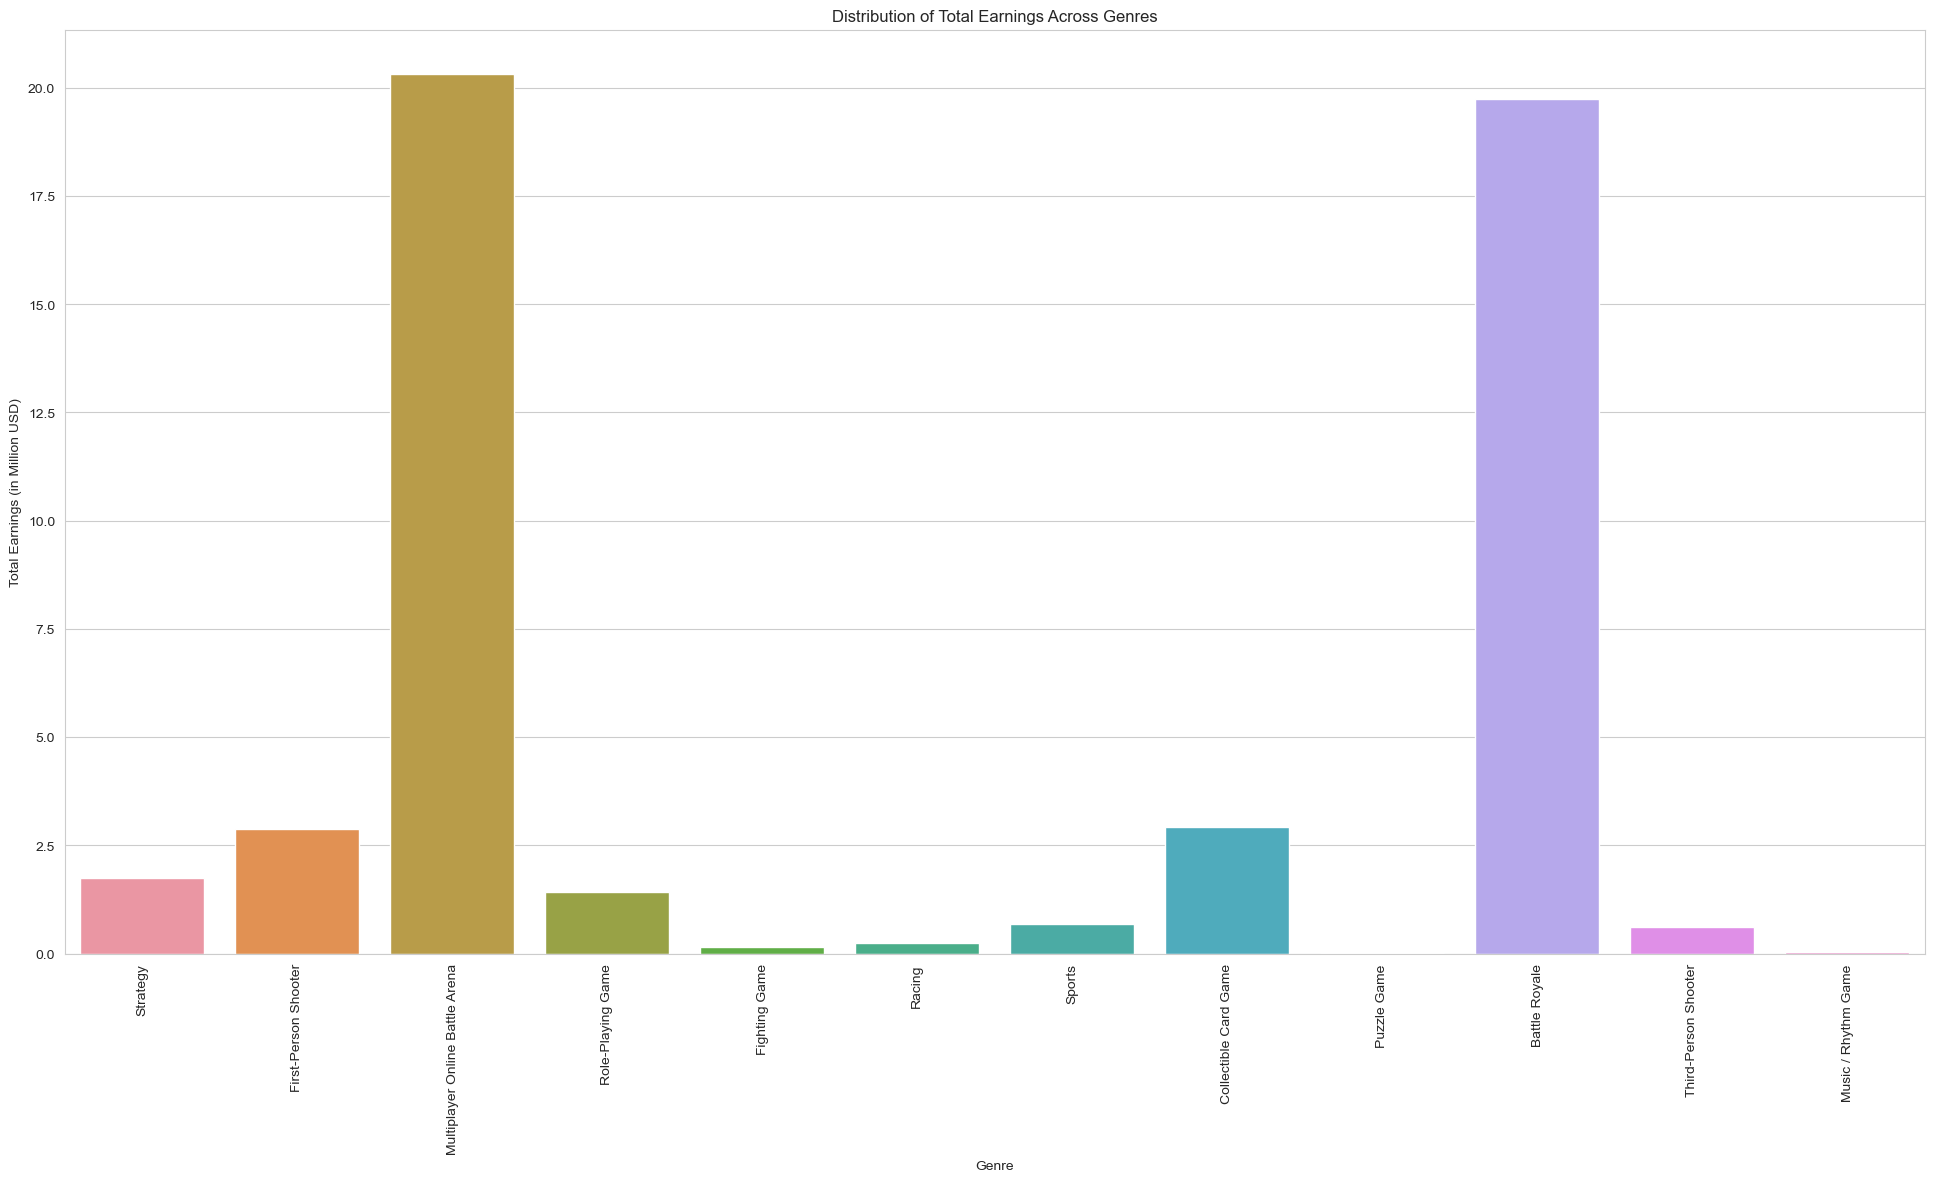

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

general_esport_data['TotalEarnings_Millions'] = general_esport_data['TotalEarnings'] / 1e6

sns.set_style("whitegrid")
plt.figure(figsize=(24, 12))

sns.barplot(x='Genre', y='TotalEarnings_Millions', data=general_esport_data, errorbar=None)
plt.xticks(rotation=90)
plt.title('Distribution of Total Earnings Across Genres')
plt.ylabel('Total Earnings (in Million USD)')
plt.xlabel('Genre')
plt.show()

### Distribution of total professional players across genres

To understand which genres have the most participation in terms of professional players since 'total players' in the dataset here indicates 'total amount of players who received a prize'

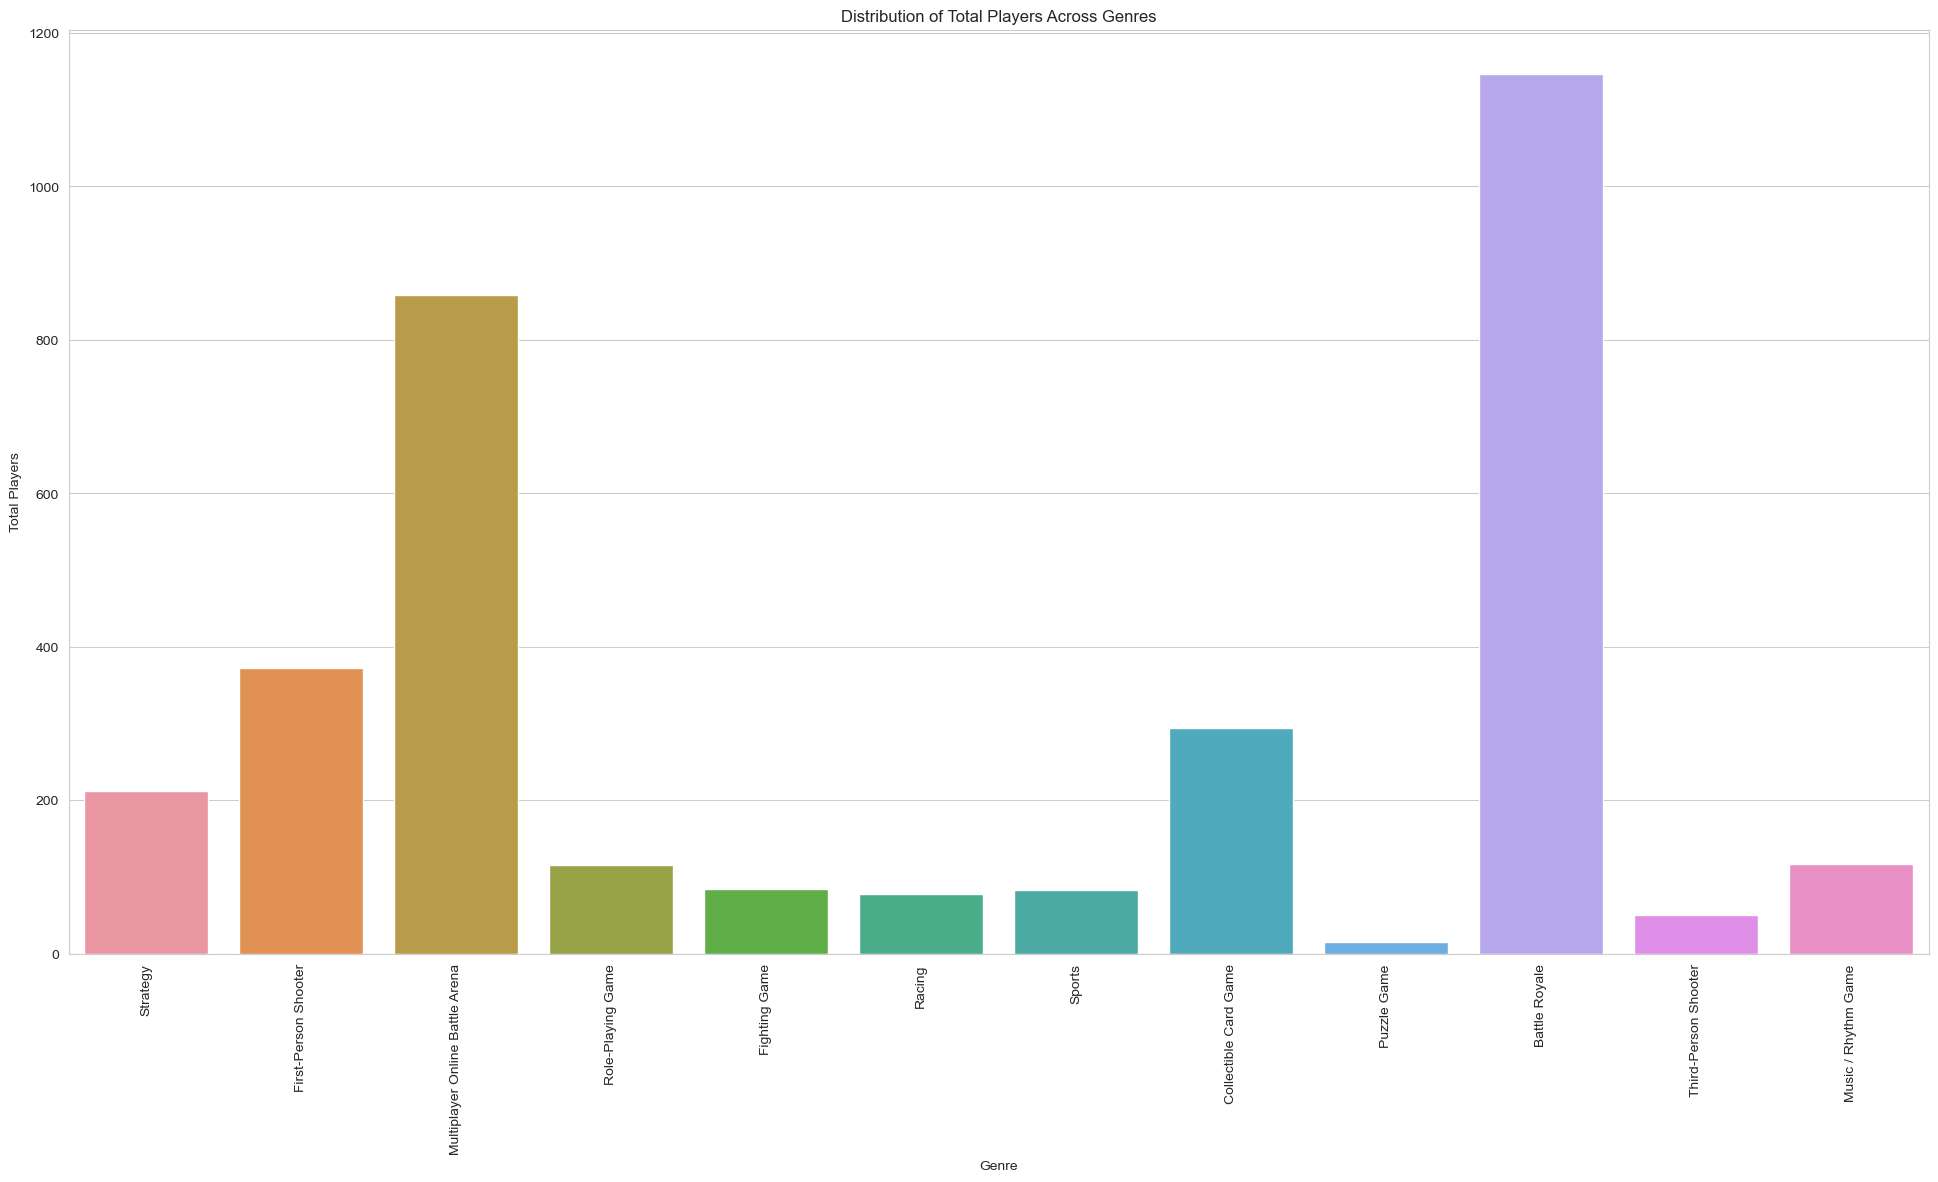

In [7]:
plt.figure(figsize=(24, 12))

sns.barplot(x='Genre', y='TotalPlayers', data=general_esport_data, errorbar=None)
plt.xticks(rotation=90)
plt.title('Distribution of Total Players Across Genres')
plt.ylabel('Total Players')
plt.xlabel('Genre')
plt.show()


It is expected that both MOBA and Battle Royale should have the most 'Total Players (Participants)' due to their larger prizepool money that aims to attract more players into the competitive scene of eSports.

In [32]:
fav_games = ['Dota 2', 'League of Legends', 'VALORANT', 'Counter-Strike']
fav_games_data = general_esport_data[general_esport_data['Game'].isin(fav_games)]
fav_games_players = fav_games_data[['Game', 'TotalPlayers']]
fav_games_players

,Game,TotalPlayers
102,Counter-Strike,4264
189,VALORANT,6097
206,Dota 2,4711
211,League of Legends,9047


## Historical Trends

### Monthly Trend of Total Earnings

/var/folders/rq/tz50yr0n63d3672cpbvdlvvc0000gn/T/ipykernel_21344/3293512923.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_earnings = historical_esport_data.groupby(historical_esport_data['Date'].dt.to_period("M")).sum()['Earnings'].reset_index()


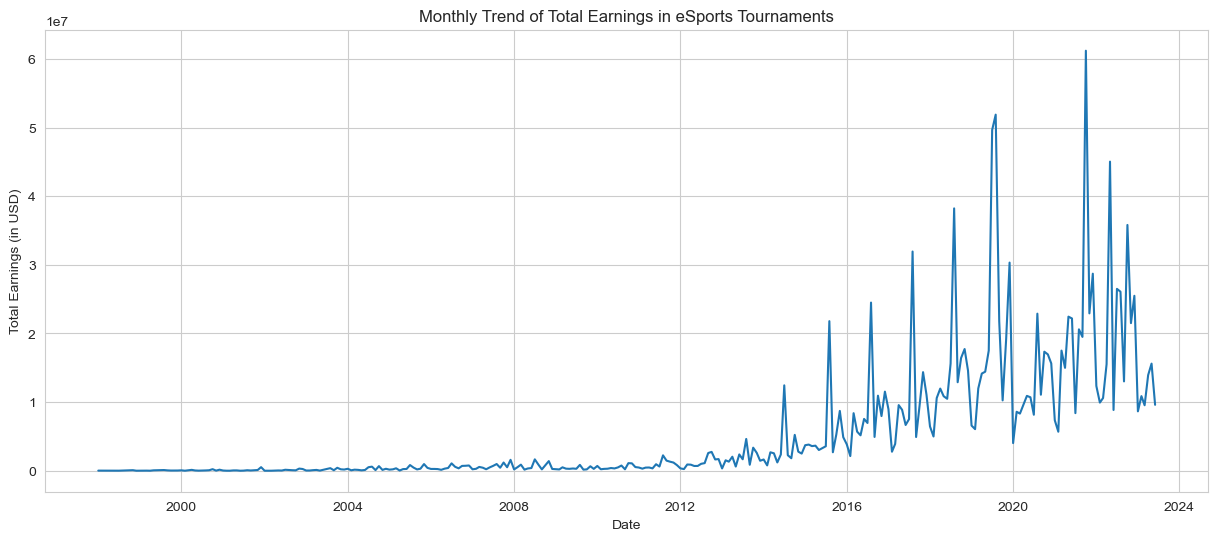

In [35]:
historical_esport_data['Date'] = pd.to_datetime(historical_esport_data['Date'])

monthly_earnings = historical_esport_data.groupby(historical_esport_data['Date'].dt.to_period("M")).sum()['Earnings'].reset_index()
monthly_earnings['Date'] = monthly_earnings['Date'].dt.to_timestamp()

plt.figure(figsize=(15, 6))

sns.lineplot(x='Date', y='Earnings', data=monthly_earnings)
plt.title('Monthly Trend of Total Earnings in eSports Tournaments')
plt.ylabel('Total Earnings (in USD)')
plt.xlabel('Date')
plt.show()

Observation:

1. There has been a general upward trend in total earnings over time, reflecting the growth of the eSports industry.
2. Some spikes and fluctuations indicate specific months or periods when earnings were exceptionally high or low.

### Monthly Trend of Total Players (Participants)

/var/folders/rq/tz50yr0n63d3672cpbvdlvvc0000gn/T/ipykernel_21344/412463481.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_players = historical_esport_data.groupby(historical_esport_data['Date'].dt.to_period("M")).sum()['Players'].reset_index()


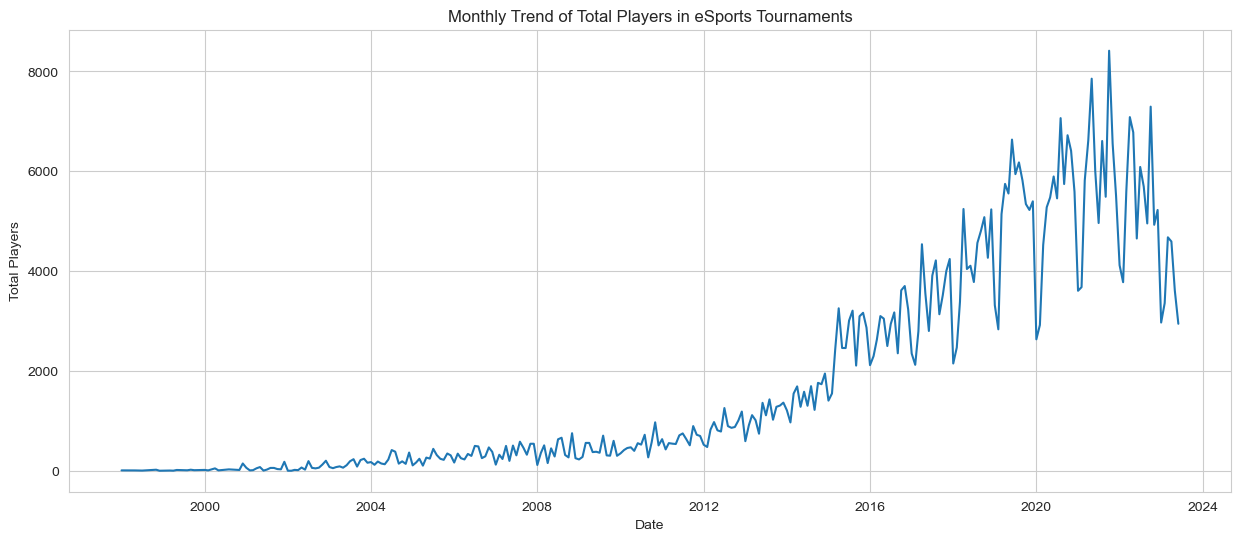

In [36]:
monthly_players = historical_esport_data.groupby(historical_esport_data['Date'].dt.to_period("M")).sum()['Players'].reset_index()
monthly_players['Date'] = monthly_players['Date'].dt.to_timestamp()

plt.figure(figsize=(15, 6))

sns.lineplot(x='Date', y='Players', data=monthly_players)
plt.title('Monthly Trend of Total Players in eSports Tournaments')
plt.ylabel('Total Players')
plt.xlabel('Date')
plt.show()

Observation:

1. A general upward trend in player participation over time, reflecting the increasing popularity of eSports.
2. Some fluctuations and spikes in player numbers, possibly related to specific events or game releases.

### Monthly Trend of Total Tournaments

/var/folders/rq/tz50yr0n63d3672cpbvdlvvc0000gn/T/ipykernel_21344/4124481681.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_tournaments = historical_esport_data.groupby(historical_esport_data['Date'].dt.to_period("M")).sum()['Tournaments'].reset_index()


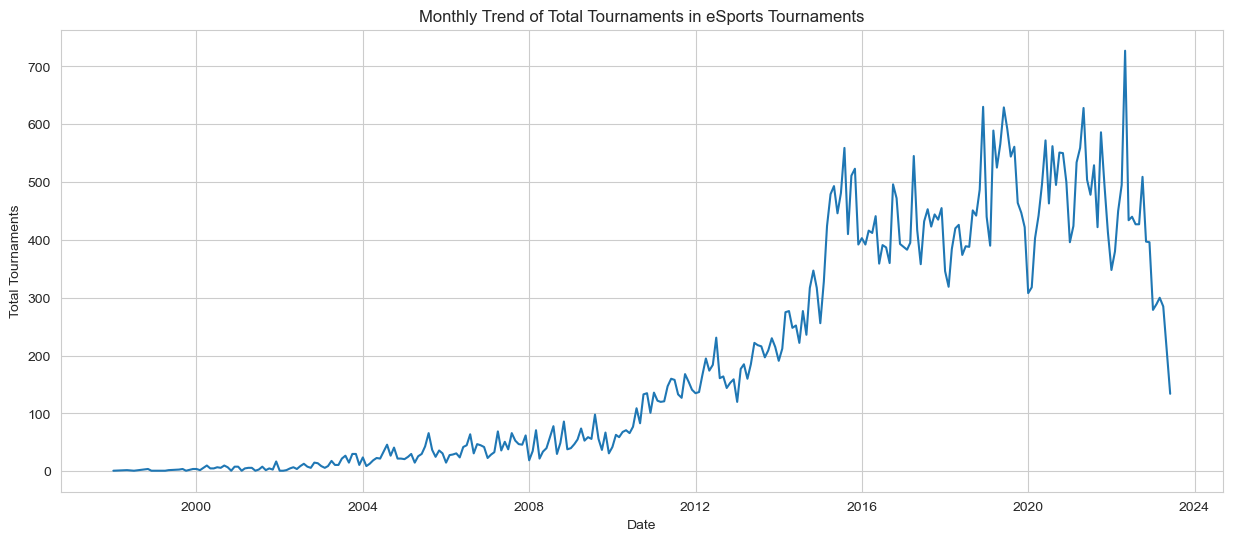

In [37]:
monthly_tournaments = historical_esport_data.groupby(historical_esport_data['Date'].dt.to_period("M")).sum()['Tournaments'].reset_index()
monthly_tournaments['Date'] = monthly_tournaments['Date'].dt.to_timestamp()

plt.figure(figsize=(15, 6))

sns.lineplot(x='Date', y='Tournaments', data=monthly_tournaments)
plt.title('Monthly Trend of Total Tournaments in eSports Tournaments')
plt.ylabel('Total Tournaments')
plt.xlabel('Date')
plt.show()

Observations:

1. An overall increase in the number of tournaments over time, reflecting the growth and diversification of the eSports industry.
2. Some variations in the number of tournaments, which could be influenced by seasons, game releases, or other industry factors.

### Top 5 Games by Earnings Overtime

/var/folders/rq/tz50yr0n63d3672cpbvdlvvc0000gn/T/ipykernel_21344/2827141641.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_top_5_games_earnings = top_5_games_data.groupby([top_5_games_data['Date'].dt.to_period("M"), 'Game']).sum()['Earnings'].reset_index()


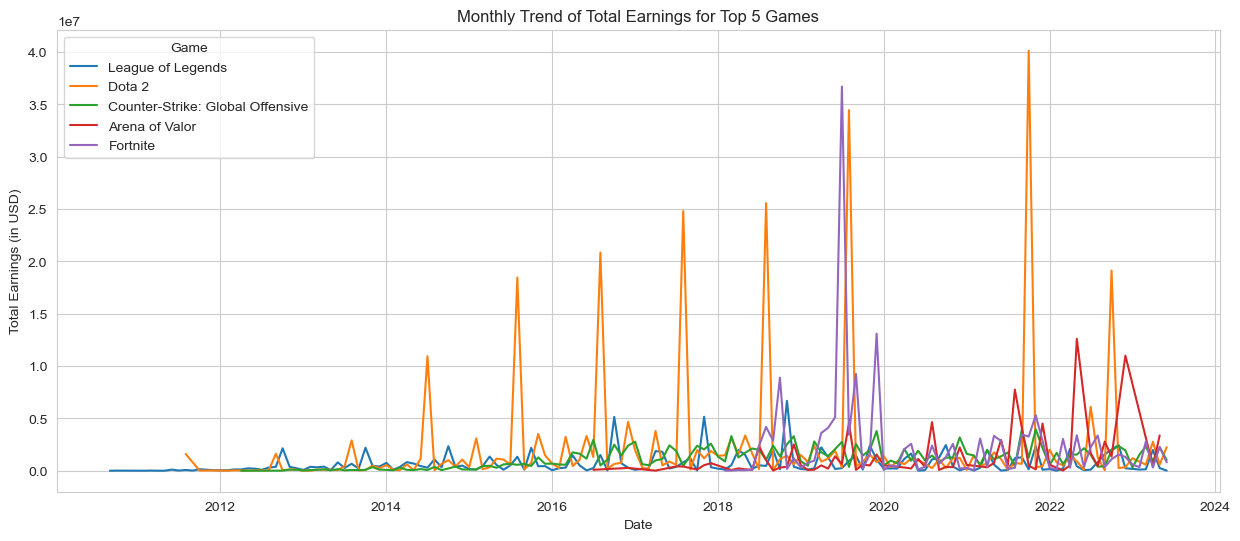

In [38]:
top_5_games = historical_esport_data.groupby('Game')['Earnings'].sum().nlargest(5).index
top_5_games_data = historical_esport_data[historical_esport_data['Game'].isin(top_5_games)]

monthly_top_5_games_earnings = top_5_games_data.groupby([top_5_games_data['Date'].dt.to_period("M"), 'Game']).sum()['Earnings'].reset_index()
monthly_top_5_games_earnings['Date'] = monthly_top_5_games_earnings['Date'].dt.to_timestamp()

plt.figure(figsize=(15, 6))

sns.lineplot(x='Date', y='Earnings', hue='Game', data=monthly_top_5_games_earnings)
plt.title('Monthly Trend of Total Earnings for Top 5 Games')
plt.ylabel('Total Earnings (in USD)')
plt.xlabel('Date')
plt.legend(title='Game')
plt.show()

My observations:

1. ***Dominance of Specific Games***: Some games have consistently dominated the earnings charts, reflecting their sustained popularity and competitive scene.
2. ***Rise and Fall***: Certain games have seen a rise in earnings at specific periods, followed by stabilization or decline, possibly due to changes in the competitive landscape or game updates.
3. ***Competitive Landscape***: The presence of multiple top-performing games indicates a diverse and dynamic competitive landscape in the eSports industry.

## Game Specific Insights

### Top 10 Games by Total Earnings

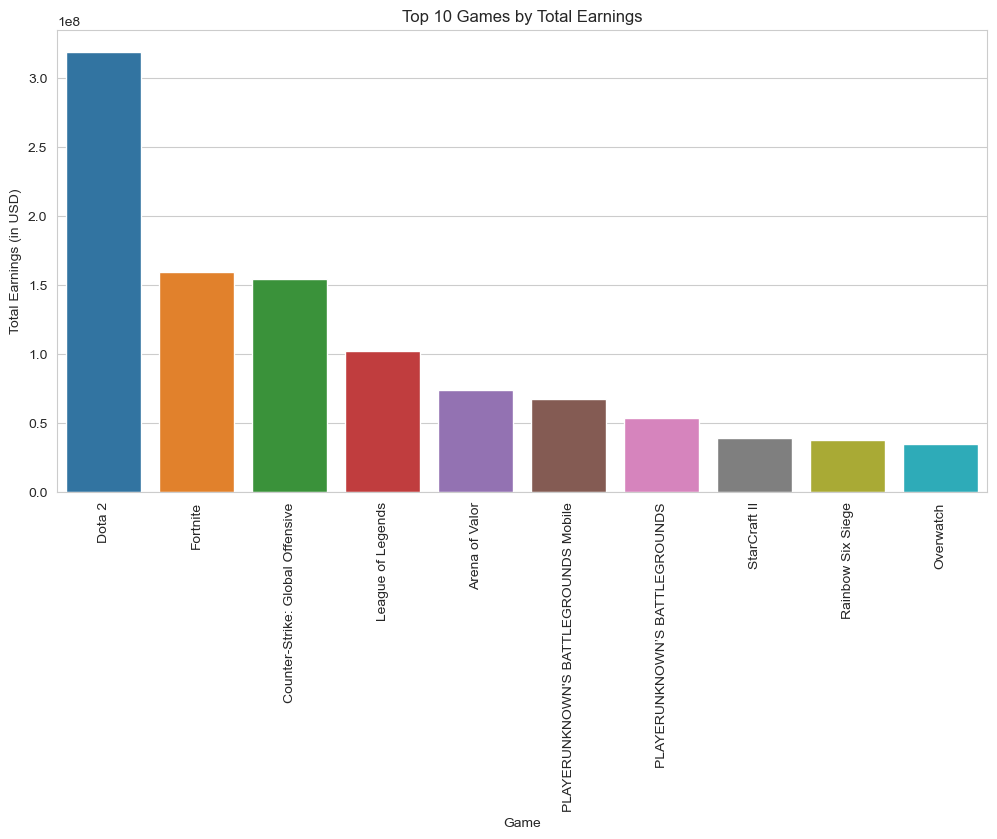

In [39]:
top_10_games_earnings = general_esport_data.nlargest(10, 'TotalEarnings')

plt.figure(figsize=(12, 6))

sns.barplot(x='Game', y='TotalEarnings', data=top_10_games_earnings)
plt.xticks(rotation=90)
plt.title('Top 10 Games by Total Earnings')
plt.ylabel('Total Earnings (in USD)')
plt.xlabel('Game')
plt.show()

### Top 10 Games by Total Players

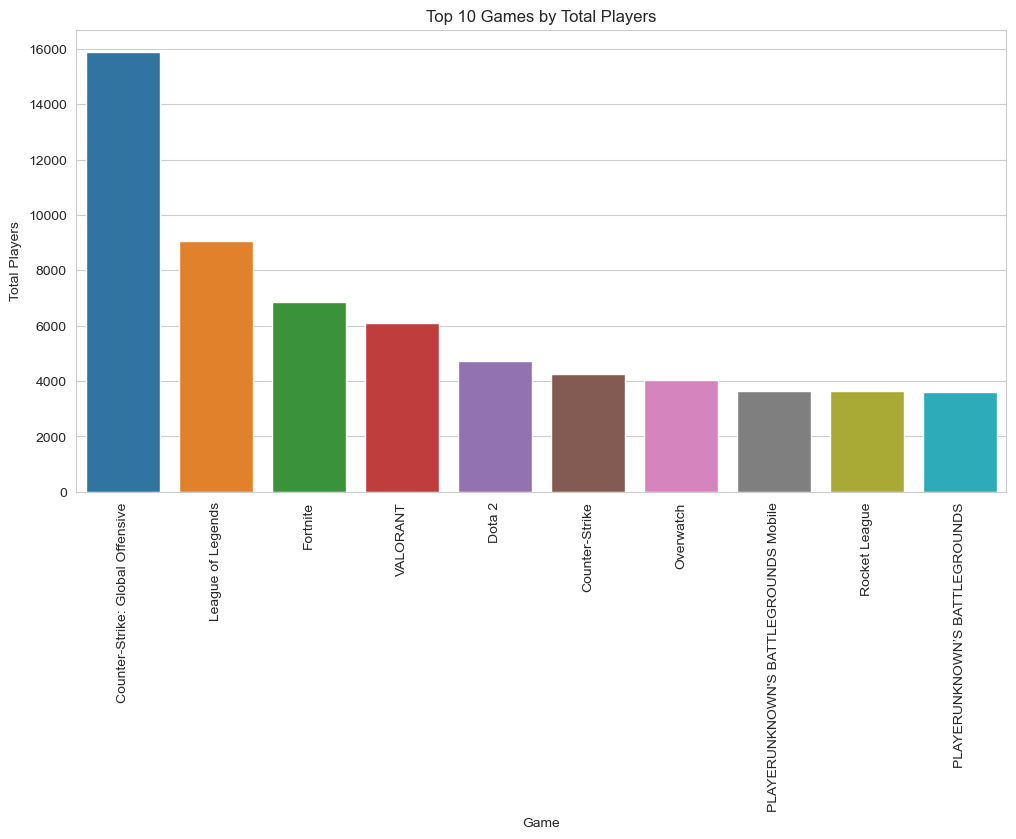

In [40]:
top_10_games_players = general_esport_data.nlargest(10, 'TotalPlayers')

plt.figure(figsize=(12, 6))

sns.barplot(x='Game', y='TotalPlayers', data=top_10_games_players)
plt.xticks(rotation=90)
plt.title('Top 10 Games by Total Players')
plt.ylabel('Total Players')
plt.xlabel('Game')
plt.show()


## Conclusion

This analysis has provided a comprehensive overview of the eSports industry, focusing on general trends, historical evolution, and game-specific insights. The key takeaways include:

1. Growth and Diversity: The eSports industry has seen consistent growth in earnings, players, and tournaments, with a diverse range of games and genres.
2. Historical Trends: Analysis of monthly trends revealed the dynamic nature of the industry, with fluctuations and peaks in earnings, players, and tournaments.
3. Leading Games: The top games by earnings and players reflect the most influential titles that have shaped competitive gaming.